# Esteira de Aprendizado de Máquina: Car Evaluation Dataset

Este notebook implementa uma esteira completa de aprendizado de máquina utilizando o dataset [Car Evaluation](https://archive.ics.uci.edu/dataset/19/car+evaluation) do UCI Machine Learning Repository.

O objetivo é prever a aceitabilidade de um carro com base em atributos como preço, manutenção, número de portas, capacidade, tamanho do porta-malas e segurança.

In [115]:
# Importação das bibliotecas necessárias
import pandas as pd  # Biblioteca para manipulação de dados em DataFrames
import numpy as np  # Biblioteca para operações numéricas
from sklearn.model_selection import train_test_split  # Função para dividir os dados em conjuntos
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Pré-processadores para normalização e codificação
from sklearn.compose import ColumnTransformer  # Permite aplicar transformações em colunas específicas
from sklearn.pipeline import Pipeline  # Permite criar um fluxo de processamento (pipeline)
from sklearn.linear_model import LogisticRegression  # Modelo de Regressão Logística
from sklearn.metrics import confusion_matrix, accuracy_score  # Métricas de avaliação do modelo
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Carregamento do dataset Car Evaluation
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"  # URL do dataset
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]  # Nomes das colunas
df = pd.read_csv(url, names=columns)  # Lê o arquivo CSV e atribui os nomes das colunas
df.head()  # Exibe as primeiras linhas do DataFrame

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Estatísticas descritivas gerais da base escolhida

In [117]:
# Estatísticas descritivas (para variáveis categóricas, mostramos contagem de valores)
df.describe(include='all')  # Mostra estatísticas descritivas para todas as colunas, inclusive categóricas

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [118]:
# Métrica de balanceamento das classes (proporção de cada classe)
print("Proporção de cada classe no target ('class'):")
print(df['class'].value_counts(normalize=True))

Proporção de cada classe no target ('class'):
class
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: proportion, dtype: float64


## Transformação em coluna: Agrupamento de categorias raras em 'doors'

In [119]:
# Agrupando valores '5more' em 'doors' para '5'
df['doors'] = df['doors'].replace('5more', '5')  # Substitui '5more' por '5' na coluna 'doors'
df['doors'].value_counts()  # Conta a frequência de cada valor em 'doors'

doors
2    432
3    432
4    432
5    432
Name: count, dtype: int64

## Transformação em linha: Remoção de linhas duplicadas (se houver)

In [120]:
# Remoção de linhas duplicadas
df = df.drop_duplicates()  # Remove linhas duplicadas do DataFrame
df.shape  # Mostra o formato (número de linhas e colunas) do DataFrame após a remoção

(1728, 7)

## Criação dos subconjuntos: treino, validação e teste

In [121]:
# Separação em features e target
X = df.drop("class", axis=1)  # Remove a coluna 'class' para obter as features (X)
y = df["class"]  # Define a coluna 'class' como variável alvo (y)

# Divisão em treino (60%), validação (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)  # Divide em treino e temporário
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)  # Divide temporário em validação e teste

print("Treino:", X_train.shape)  # Exibe o tamanho do conjunto de treino
print("Validação:", X_val.shape)  # Exibe o tamanho do conjunto de validação
print("Teste:", X_test.shape)  # Exibe o tamanho do conjunto de teste

Treino: (1036, 6)
Validação: (346, 6)
Teste: (346, 6)


## Treinamento e avaliação de um modelo

In [122]:
# Pipeline para transformar variáveis categóricas em dummies (OneHotEncoder)
categorical_features = X.columns.tolist()  # Lista com os nomes das colunas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Aplica OneHotEncoder em todas as colunas categóricas
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Primeiro passo: pré-processamento das features
    ('classifier', LogisticRegression(max_iter=200))  # Segundo passo: modelo de Regressão Logística
])

# Treinamento do modelo
pipeline.fit(X_train, y_train)  # Ajusta o pipeline aos dados de treino

# Avaliação no conjunto de validação
y_pred_val = pipeline.predict(X_val)  # Realiza predições no conjunto de validação
acc_val = accuracy_score(y_val, y_pred_val)  # Calcula a acurácia na validação
print("Acurácia na validação:", acc_val)  # Exibe a acurácia

Acurácia na validação: 0.9104046242774566


## Matriz de confusão e acurácia para o modelo gerado

In [123]:
# Matriz de confusão e acurácia no conjunto de teste
y_pred_test = pipeline.predict(X_test)  # Realiza predições no conjunto de teste
cm = confusion_matrix(y_test, y_pred_test, labels=pipeline.classes_)  # Calcula a matriz de confusão
acc_test = accuracy_score(y_test, y_pred_test)  # Calcula a acurácia no teste
print("Matriz de confusão:\n", cm)  # Exibe a matriz de confusão
print("Acurácia no teste:", acc_test)  # Exibe a acurácia

Matriz de confusão:
 [[ 65   1  11   0]
 [  5   7   0   2]
 [ 14   0 228   0]
 [  1   0   0  12]]
Acurácia no teste: 0.9017341040462428


## Resultado de uma predição do modelo implantado

In [124]:
# Exemplo de predição
sample = X_test.iloc[[0]]  # Seleciona a primeira amostra do conjunto de teste
predicted_class = pipeline.predict(sample)  # Realiza a predição para a amostra selecionada
print("Amostra:", sample.values)  # Exibe os valores da amostra
print("Classe prevista:", predicted_class[0])  # Exibe a classe prevista pelo modelo

Amostra: [['vhigh' 'low' '2' 'more' 'med' 'high']]
Classe prevista: unacc


## Visualização dos dados: Distribuição das classes

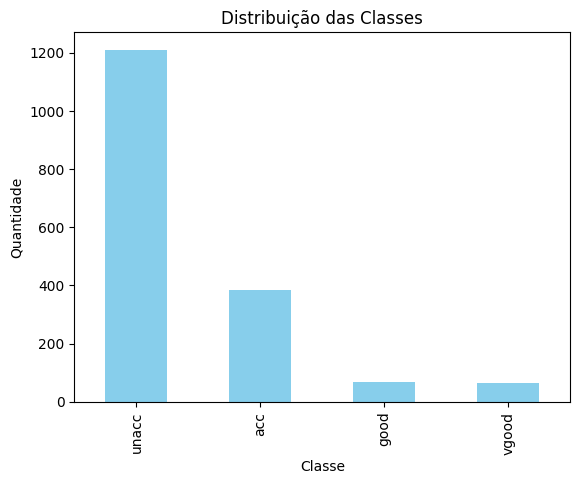

In [125]:
# Gráfico de barras para a distribuição das classes
df['class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.show()

## Visualização: Matriz de confusão do conjunto de teste

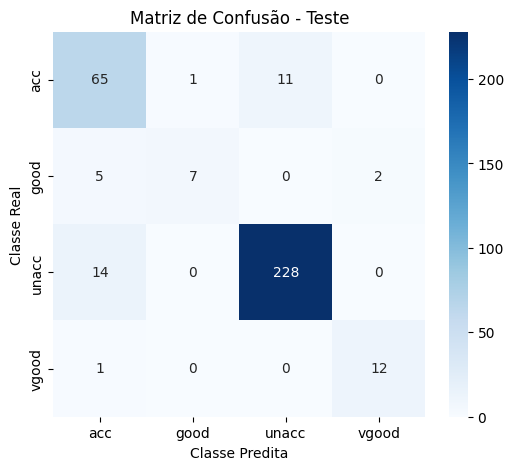

In [126]:
# Plotando a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão - Teste')
plt.show()